<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.


Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/datasets/insurance.csv')

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
data.info() # выведем основную информацию по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [ ]:
data.isna().sum()  # проверяем на пропуски

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [ ]:
data.duplicated().sum() # проверяем на дубликаты

153

In [ ]:
data.drop_duplicates(inplace = True) # избавляемся от них

In [ ]:
data.duplicated().sum() # проверяем, не осталось ли дубликатв после удаления

0

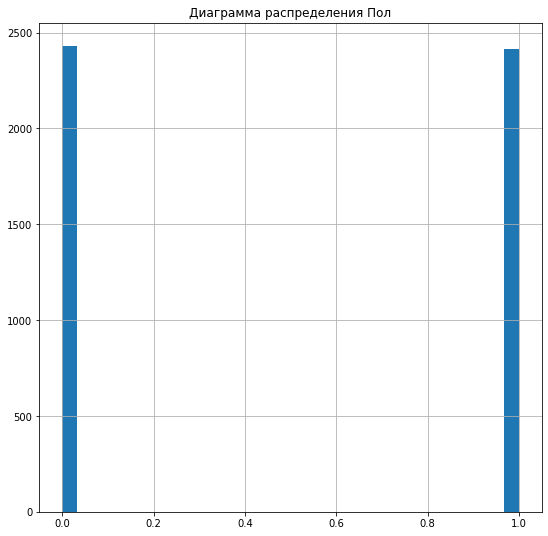

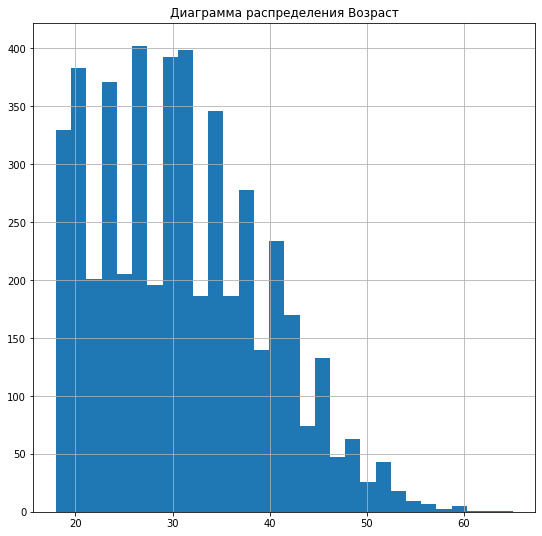

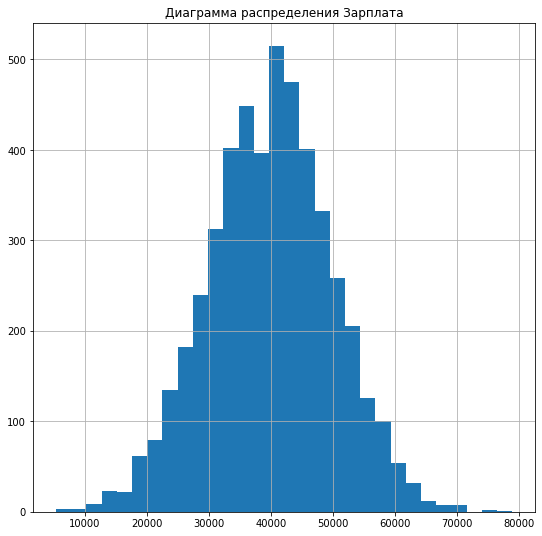

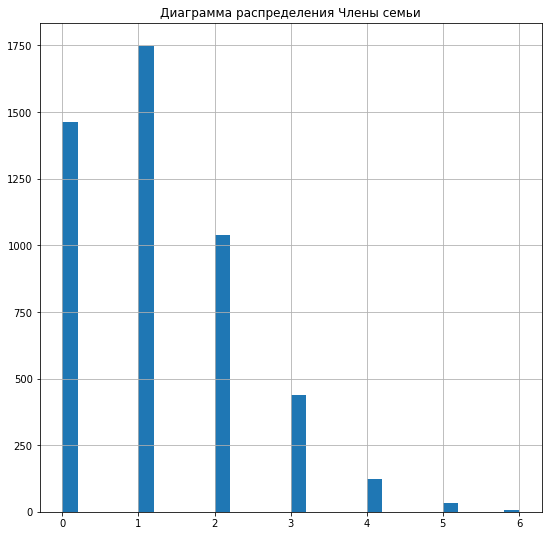

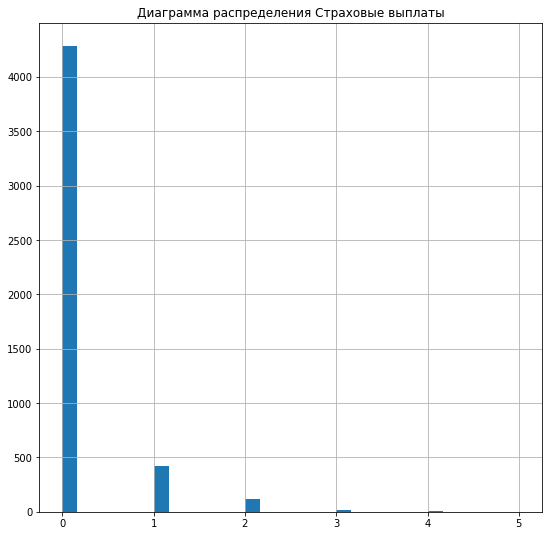

In [ ]:
columns = ['Пол','Возраст','Зарплата', 'Члены семьи', 'Страховые выплаты']
for col in columns:
    plt.figure(figsize=(9, 9))
    plt.title(f'Диаграмма распределения {col}')
    data[col].hist(bins=30)


plt.show()

**Мини вывод:**

В результате обработки данных мы получили основные сведения, проверили, что в табилце отсутствуют пропуски, но есть дубликаты, о которых мы избавились. Типы данных в таблице изменений не требуют. Из графиков видно, что гендерное распределение примерно одинаково (мужчин и женщин), основная масса клиентов в возрасте от 20 до 40 лет, у кого до 3-х членов семьи, с ЗП от 30-50 тр, и на графике распределения страховых выплат, чаще всего у страховой компании преобладают клиенты, у кого не было страховых выплат(идеальные клиенты).

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Умножение матриц


**Ответьте на вопрос и обоснуйте решение.
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.**

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:** Для обоснования ответа нам понадобится матрица для домноженных признаков, т.е. обратимая матрица . Исходная матрица будет размером 5000х4, матрица для домножения, по законам линейной алгебры, должна быть квадратная, и, в данном случае, она будет 4х4. Новая матрица примет вид Х*Р. Формула предсказаний будет выглядить так:

$$
a' = XPw'
$$


 формула обучения:

$$
w' = ((XP)^T XP)^{-1} XP^T y
$$


задача обучения

$$
w = \arg\min_w MSE(XPw, y)
$$


Нам понадобятся следующие формулы для обоснования:

$$
(AB)^T=B^T*A^T
$$

$$
(AB)^{-1}=B^{-1} * A^{-1}
$$

$$
AA^{-1} = E
$$

$$
AE=EA=A
$$

Раскроем скобки в формуле предсказания:

$$
a'=XP(P^TX^TXP)^{-1}P^TX^Ty
$$

$$
a' = XPP^{-1}(P^TX^TX)^{-1}P^TX^Ty
$$

Выделим из полученного уравнения множители $$P^T и X^TX$$

$$
a' = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

Произведения $$PP^{-1} и (P^T)^{-1}P^T$$ дают единичные матрицы, соответственно их можно исключить из уравнения, и получаем следующий вид:

$$
a' = X(X^TX)^{-1}X^Ty
$$

$$
(X^TX)^{-1}X^Ty=w
$$

следовательно
$$
a' = Xw
$$

Мы получили ту же формулу предсказания, что и первоначальная, следовательно делаем вывод, что умножение признаков на обратимую матрицу не изменяют предсказания.

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
**$$
w' = (XP^T XP)^{-1} XP^T y
$$**

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования возьмем умножение обучающих признаков первоначальной матрицы и умножим их на обратимую матрицу размером 4х4.  Используя модель линейной регрессии обучим ее и посчитаем метрику r2. Затем умножим обуающие признаки на обратимую матрицу, обучим на ней модель линейной регрессии и сравним метрики r2, которые должны будут быть одинаковыми.

**Обоснование**

Из п.2 видим, что умножение обучащих признаков на обратимую матрицу не повлияло на предсказания модели, предполагаем, что и метрики r2 будут одинаковыми, т.к. предсказания тоже одинаковые.

## Проверка алгоритма

In [ ]:
features = data.drop(['Страховые выплаты'], axis =1)  #создаем признаки для модели линейной регрессии
target = data['Страховые выплаты']
print(features.shape)
print(target.shape)

(4847, 4)
(4847,)


In [ ]:
model = LinearRegression() #обучаем модель линейной регрессии до преобразования
model.fit(features,target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print('R2 для модели до преобразования', r2)

R2 для модели до преобразования 0.4302010044852066


In [ ]:
# создадим обратную матрицу размером 4х4

P = np.random.normal(size=(4, 4))
Pinv = np.linalg.inv(P)
print(P)


[[ 1.79682083 -0.64970606 -1.17342263  0.51722414]
 [ 0.26369261 -0.20243947  0.16215178  0.07840577]
 [ 0.56976638 -0.74742663  1.50286172 -1.20132928]
 [ 0.33069931 -0.73597352 -1.37625879 -0.43617695]]


Матрица обратима, можно двигаться дальше

In [ ]:
features_p = features @ P
# умножаем признаки на обратную матрицу

In [ ]:
model_p = LinearRegression()   #строим модель линейной регрессии и обуаем ее на новых признаках
model_p.fit(features_p, target)
predictions_p = model_p.predict(features_p)
r2_p = r2_score(target, predictions_p)
print(f'R2 для преобразованной модели {r2_p}')

R2 для преобразованной модели 0.4302010044851936


**Вывод**

Метрика R2 для модели обученной на первоначальных признаках и преобразованных ничем не отличается, и равна 0.4302010044852066, алгоритм преобразования подтвердился. Предсказания модели не меняются при умножении на обратимую матрицу.